In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine_df=pd.merge(ride_df,city_df, on='city')
# Display the data table for preview
combine_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
combine_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [3]:
Urban_df=combine_df[combine_df['type']=='Urban']
num_urban_rides=Urban_df.groupby('city')['ride_id'].count()
urban_avg_fare=Urban_df.groupby('city')['fare'].mean()
urban_driver = Urban_df.groupby('city').apply(lambda x: x['driver_count'].unique()).str[0]

In [4]:
Suburban_df=combine_df[combine_df['type']=='Suburban']
num_suburban_rides=Suburban_df.groupby('city')['ride_id'].count()
suburban_avg_fare=Suburban_df.groupby('city')['fare'].mean()
suburban_driver = Suburban_df.groupby('city').apply(lambda x: x['driver_count'].unique()).str[0]

In [5]:
Rural_df=combine_df[combine_df['type']=='Rural']
num_rural_rides=Rural_df.groupby('city')['ride_id'].count()
rural_avg_fare=Rural_df.groupby('city')['fare'].mean()
rural_driver = Rural_df.groupby('city').apply(lambda x: x['driver_count'].unique()).str[0]

Text(42, 37, 'Notes:\nCircle size correlates with dirver counts per city.')

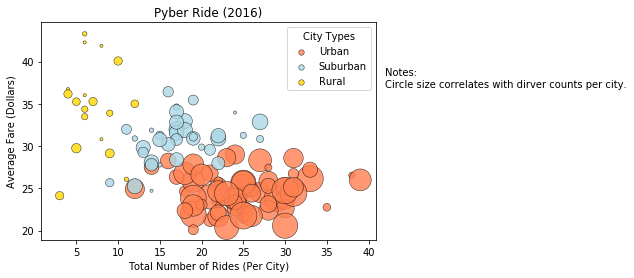

In [6]:
plt.scatter(num_urban_rides,urban_avg_fare,s=urban_driver*10,facecolor='coral',edgecolor='black',alpha=0.8,label='Urban',linewidths=0.5)
plt.scatter(num_suburban_rides,suburban_avg_fare,s=suburban_driver*10,facecolor='lightblue',edgecolor='black',alpha=0.8,label='Suburban',linewidths=0.5)
plt.scatter(num_rural_rides,rural_avg_fare,s=rural_driver*10,facecolor='gold',edgecolor='black',alpha=0.8,label='Rural',linewidths=0.5)
plt.title("Pyber Ride (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (Dollars)")
lgnd=plt.legend(title="City Types")
for i in range(3):
    lgnd.legendHandles[i]._sizes = [30]
plt.text(42, 37,'Notes:\nCircle size correlates with dirver counts per city.')

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

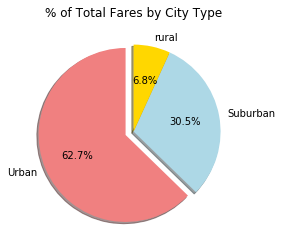

In [7]:
# Calculate Type Percents
total_fare=combine_df['fare'].sum()

urban_fare=Urban_df['fare'].sum()/total_fare
suburban_fare=Suburban_df['fare'].sum()/total_fare
rural_fare=Rural_df['fare'].sum()/total_fare
# Build Pie Chart
sizes=[urban_fare,suburban_fare,rural_fare]
explode=[0.1,0,0]
labels=['Urban','Suburban','rural']
colors=['lightcoral','lightblue','gold']
plt.pie(sizes, shadow=True, startangle=90,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure


## Total Rides by City Type

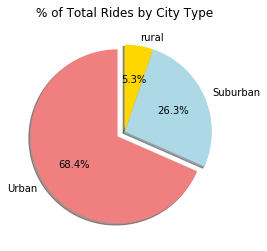

In [8]:
# Calculate Ride Percents
total_rides=combine_df['fare'].count()

urban_rides=Urban_df['fare'].count()/total_rides
suburban_rides=Suburban_df['fare'].count()/total_rides
rural_rides=Rural_df['fare'].count()/total_rides
# Build Pie Chart
rides_sizes=[urban_rides,suburban_rides,rural_rides]
plt.pie(rides_sizes, shadow=True, startangle=90,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure


## Total Drivers by City Type

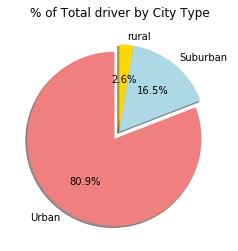

In [13]:
# Calculate Driver Percents
total_driver=urban_driver.sum()+suburban_driver.sum()+rural_driver.sum()
ur_dr=urban_driver.sum()/total_driver
su_dr=suburban_driver.sum()/total_driver
ru_dr=rural_driver.sum()/total_driver
# Build Pie Charts
driver_sizes=[ur_dr,su_dr,ru_dr]
plt.pie(driver_sizes, shadow=True, startangle=90,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.title("% of Total driver by City Type")
plt.show()
# Save Figure
